<a href="https://colab.research.google.com/github/OSGeoLabBp/tutorials/blob/master/hungarian/machine_learning/lessons/yolo_cv2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Példa a YOLO modell használatára saját Python kódból

Telepítsük a *ultralytics* modult, hogy a már betanított YOLO modellt használhassuk.

In [16]:
!pip -q install ultralytics

In [17]:
from matplotlib import pyplot as plt
import cv2
from ultralytics import YOLO

Töltsük be a YOLO modell súlyait.

In [18]:
model = YOLO("yolo-Weights/yolov8n.pt")
model.info()

YOLOv8n summary: 225 layers, 3157200 parameters, 0 gradients, 8.9 GFLOPs


(225, 3157200, 0, 8.8575488)

Az alábbi objektum fajták detektálására tanították be a modellt.

In [19]:
classNames = model.names
for key, value in classNames.items():
    if key % 10 == 0: print()
    print(value, end=", ")


person, bicycle, car, motorcycle, airplane, bus, train, truck, boat, traffic light, 
fire hydrant, stop sign, parking meter, bench, bird, cat, dog, horse, sheep, cow, 
elephant, bear, zebra, giraffe, backpack, umbrella, handbag, tie, suitcase, frisbee, 
skis, snowboard, sports ball, kite, baseball bat, baseball glove, skateboard, surfboard, tennis racket, bottle, 
wine glass, cup, fork, knife, spoon, bowl, banana, apple, sandwich, orange, 
broccoli, carrot, hot dog, pizza, donut, cake, chair, couch, potted plant, bed, 
dining table, toilet, tv, laptop, mouse, remote, keyboard, cell phone, microwave, oven, 
toaster, sink, refrigerator, book, clock, vase, scissors, teddy bear, hair drier, toothbrush, 

Töltsünk le egy képet!

In [20]:
!wget -q http://gita.hu/keptar/gita2022/IMG_7802.JPG

Alkalmazzuk a modellt a képre! A megtalált objektumok befoglaló téglalapja és neve mellett a találat vaószínűségét is megkapjuk.


0: 448x640 6 persons, 3 bottles, 12 wine glasss, 4 chairs, 2 dining tables, 65.1ms
Speed: 3.0ms preprocess, 65.1ms inference, 0.8ms postprocess per image at shape (1, 3, 448, 640)
 665, 402,  983, 777: person 88.5%
  89, 716,  178, 946: wine glass 83.7%
 204, 356,  574, 758: person 80.1%
 140, 342,  341, 630: person 80.1%
   7, 327,  169, 494: person 79.8%
 985, 420, 1316, 962: person 71.9%
 239, 679,  309, 845: wine glass 67.7%
   0, 647, 1323, 986: dining table 67.4%
 326, 321,  422, 487: person 66.3%
1072, 767, 1131, 896: wine glass 65.3%
 304, 666,  386, 833: wine glass 60.9%
 740, 683,  806, 848: wine glass 60.5%
 658, 636,  702, 758: wine glass 55.7%
 632, 315,  754, 583: chair 46.2%
1148, 895, 1197, 996: wine glass 45.0%
 334, 795,  424, 996: bottle 44.4%
 920, 777,  989, 930: wine glass 43.5%
 414, 839,  498, 997: bottle 42.8%
  75, 630,  230, 782: chair 37.7%
1182, 503, 1337, 925: chair 36.1%
1336, 606, 1499, 917: chair 35.7%
   0, 447,  189, 721: dining table 35.2%
1019, 881

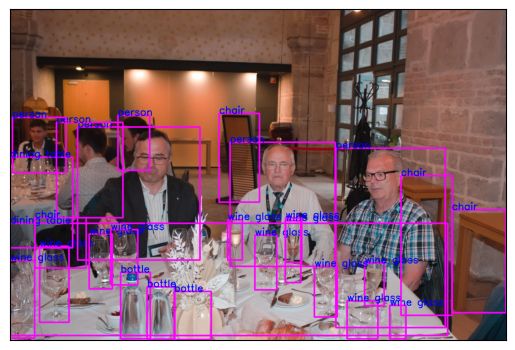

In [21]:
img = cv2.imread('IMG_7802.JPG')
for r in model.predict(img):
    for box in r.boxes:
        x1, y1, x2, y2 = box.xyxy[0]        # bounding box
        print(f"{int(x1):4d}, {int(y1):3d}, {int(x2):4d}, {int(y2):3d}: {classNames[int(box.cls[0])]} {box.conf[0]:.1%}")
        cv2.rectangle(img, (int(x1), int(y1)), (int(x2), int(y2)), (255, 0, 255), 3)
        cv2.putText(img, classNames[int(box.cls[0])], (int(x1), int(y1)),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax = plt.gca()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

A *yol.py* program a GitHub oldalon egy a webkamerából vagy egy videó fájlból érkező képek feldolgozását valósítja meg, melyet a saját gépén futtathat.